# Dogs vs Cats App

Install Mamba on Jupyter Host

```
curl -L -O "https://github.com/conda-forge/miniforge/releases/latest/download/Miniforge3-$(uname)-$(uname -m).sh"
bash Miniforge3-$(uname)-$(uname -m).sh
```

Install Python Dependencies
```
pip install fastai jupyter gradio
```

In [1]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_dog(x): return x[0].islower()

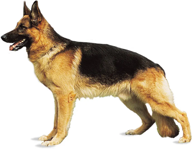

In [2]:
im = PILImage.create('dog.webp')
im.thumbnail((192,192))
im

In [3]:
#|export
learn = load_learner('model.pkl')

In [4]:
%time learn.predict(im)

CPU times: user 1.96 s, sys: 349 ms, total: 2.31 s
Wall time: 167 ms


('True', tensor(1), tensor([0.4235, 0.5765]))

In [5]:
#|export
categories = ('Cat', 'Dog')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))


In [6]:
classify_image(im)

{'Cat': 0.42346930503845215, 'Dog': 0.5765306949615479}

Enable Port Forwarding to Connect to Remote GPU Server

Port 8888 → Jupyter Server
Port 7861 → Gradio Server

``
ssh -L 8888:localhost:8888 -L 7861:localhost:7861 i72tmgpu2
``

In [ ]:
#|export
image = gr.Image()
#label = gr.outputs.Label()
examples = ['dog.webp', 'cat.jpg', 'unknown.webp']

intf = gr.Interface(classify_image, inputs=image, outputs="label", examples=examples)
intf.launch(inline=False, share=False, server_port=7861)

* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
